# Ejercicio

En base a los algoritmos visto durante la clase (DBSCAN y Mean Shift), aplicarlos a los diferentes set de datos y evaluar los resultados

## DBSCAN

In [1]:
import time
import warnings
from itertools import cycle, islice
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering, KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs, make_s_curve, make_circles
from sklearn.cluster import DBSCAN
from scipy import stats
from sklearn.preprocessing import StandardScaler


# use seaborn plotting defaults
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")


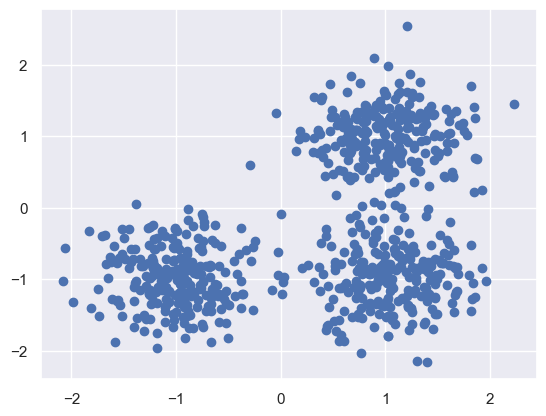

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(
    n_samples=750, 
    centers=centers, 
    cluster_std=0.4, 
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1]) #TODO
plt.show()

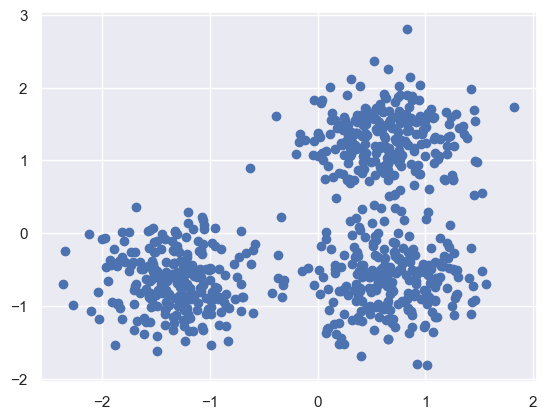

In [3]:
scaler = StandardScaler() #TODO
X = scaler.fit_transform(X) #TODO
plt.scatter(X[:, 0], X[:, 1]) #TODO
plt.show()

In [4]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X) #TODO
labels = db.labels_ #TODO

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 18


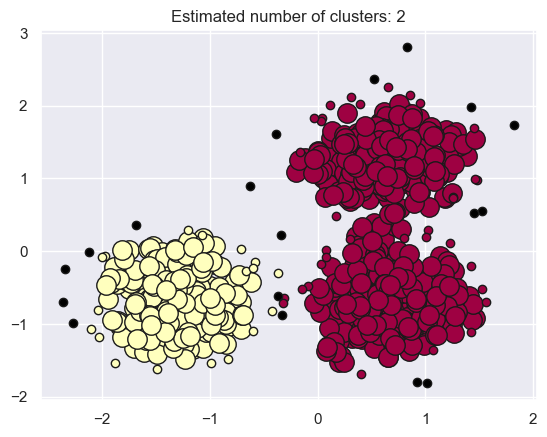

In [5]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Mean Shift

In [6]:
#!pip install skillsnetwork

In [7]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [8]:
import skillsnetwork
#await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg", overwrite=True)

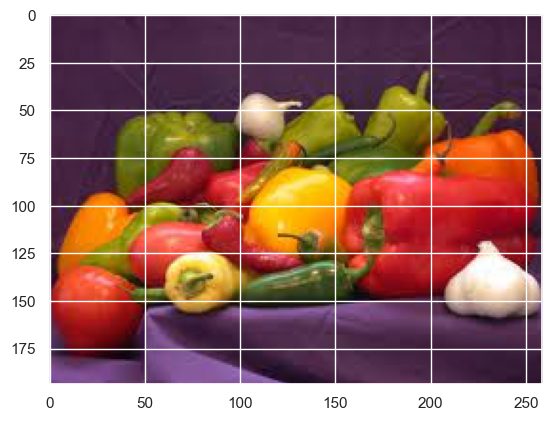

In [9]:
img = cv.imread("peppers.jpeg")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

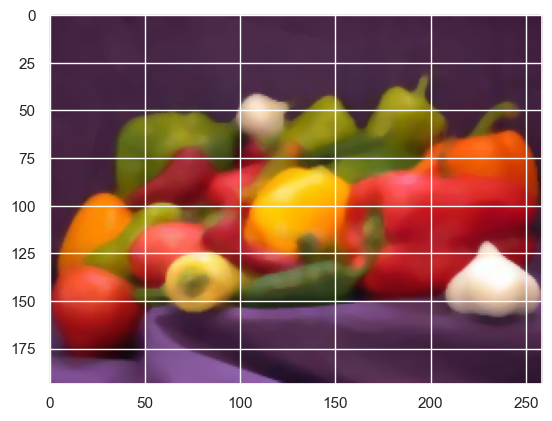

In [10]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

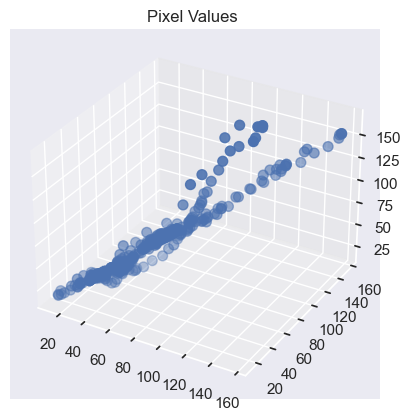

In [11]:
# We can plot the Red, Green, Blue (RGB) values as 3D points.

ax = plt.axes(projection ="3d")
ax.scatter3D(img[:, 0], img[:, 1], img[:, 2], s=50, cmap='rainbow') #TODO - Imágen se encuentra en espacio 3D
ax.set_title('Pixel Values ') 
plt.show()

In [12]:
X = img.reshape((-1,3))
print("shape: ",X.shape)
print("data type   : ",X.dtype)

shape:  (50246, 3)
data type   :  uint8


In [13]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth 

33.51403269933768

In [14]:
ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=True) #TODO
ms.fit(X) #TODO

MeanShift(bandwidth=33.51403269933768, bin_seeding=True)

In [15]:
labeled= ms.labels_  #Los labels son el resultado de la clasificación del algoritmo #TODO
labeled

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 67,  37,  70],
       [ 32,  29, 173],
       [ 25,  94,  98],
       [ 25, 130, 141],
       [127,  73, 115],
       [ 14,  95, 230],
       [  9, 132, 245],
       [  8, 182, 251],
       [158, 185, 217],
       [191, 215, 241],
       [240, 246, 251],
       [ 88, 214, 249]], dtype=uint8)

In [17]:
ms.predict(X) #TODO

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

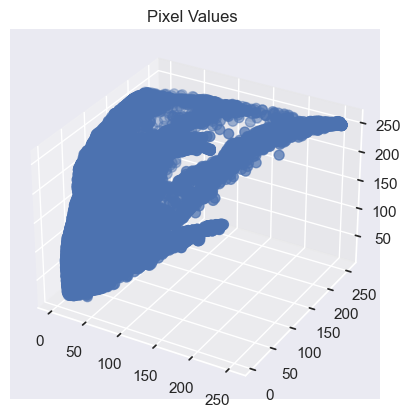

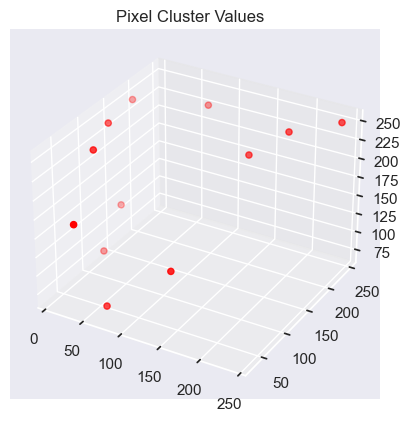

In [18]:
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=50, cmap='rainbow') #TODO
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

In [19]:
# We can assign each data point to the cluster value and reshape it back  to a Rectangular image. 

result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    
result=result.reshape(img.shape)

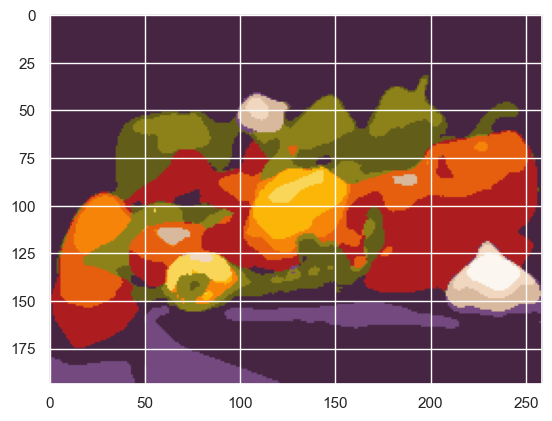

In [20]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

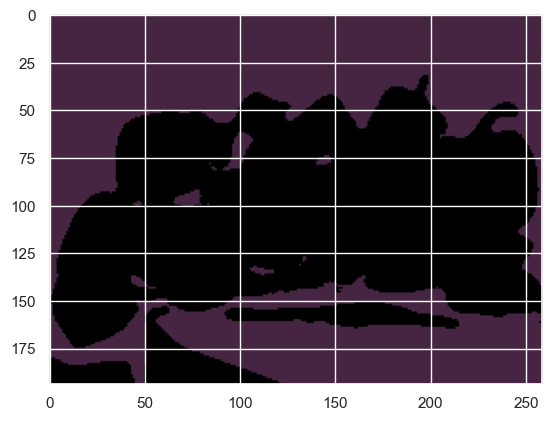

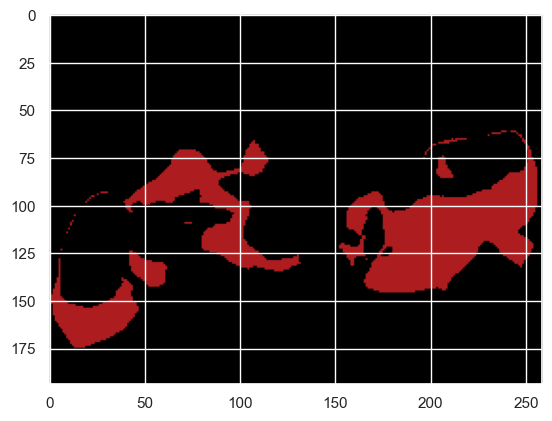

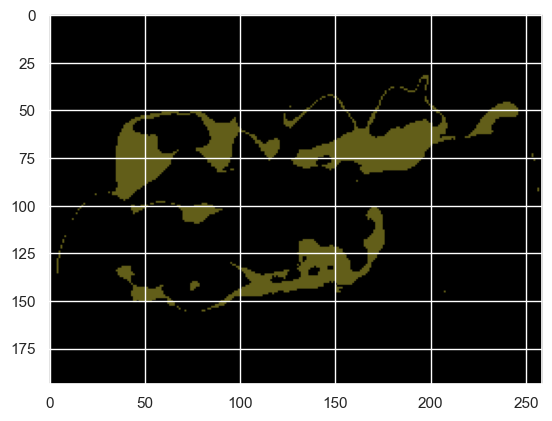

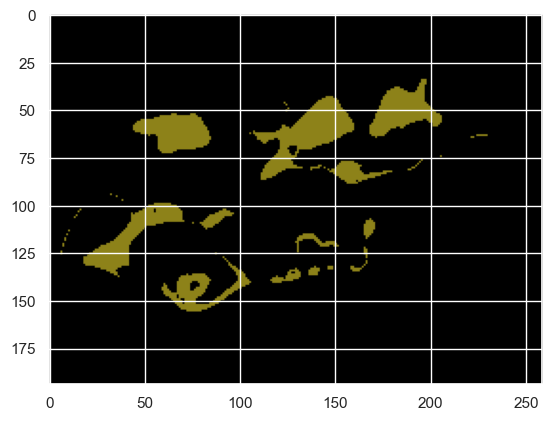

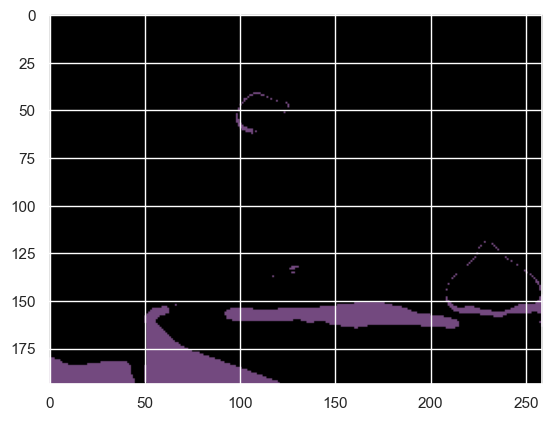

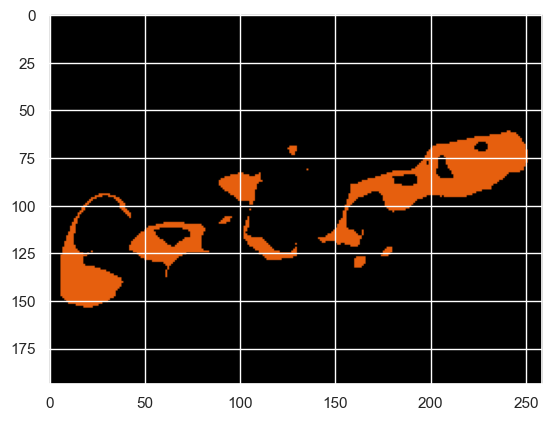

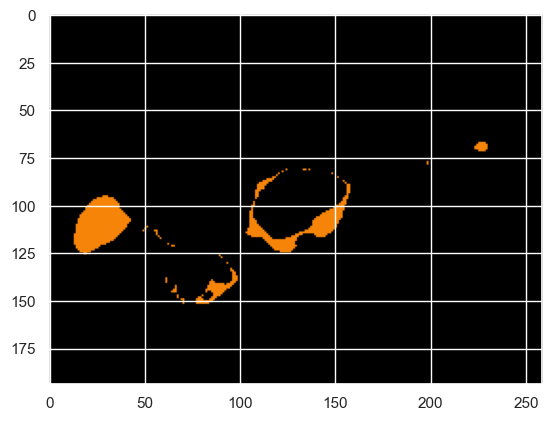

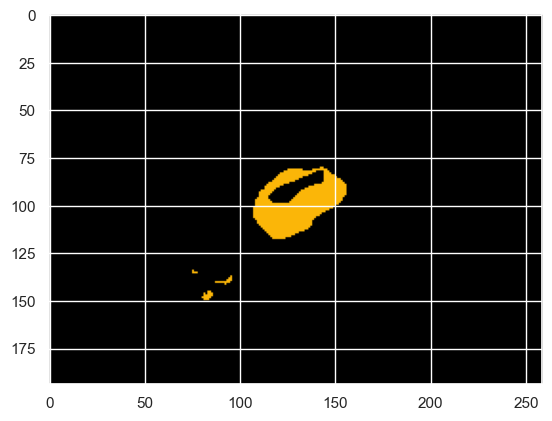

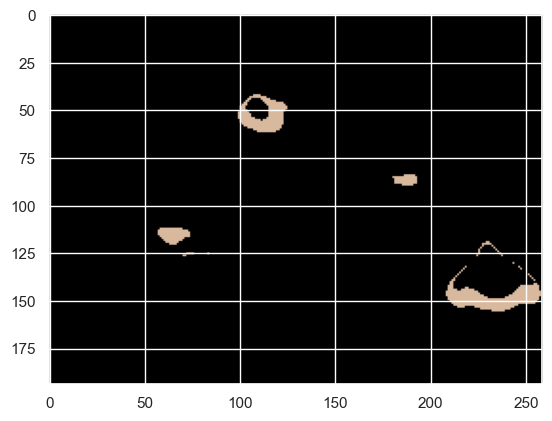

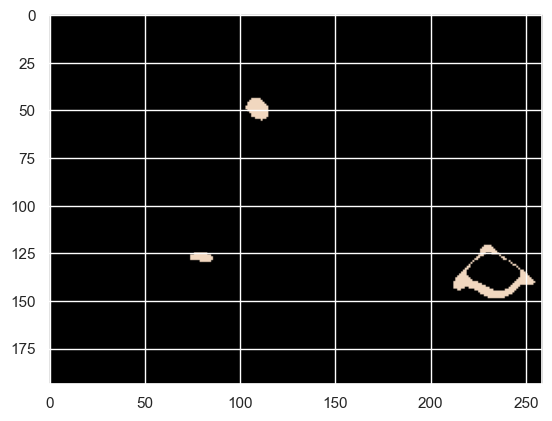

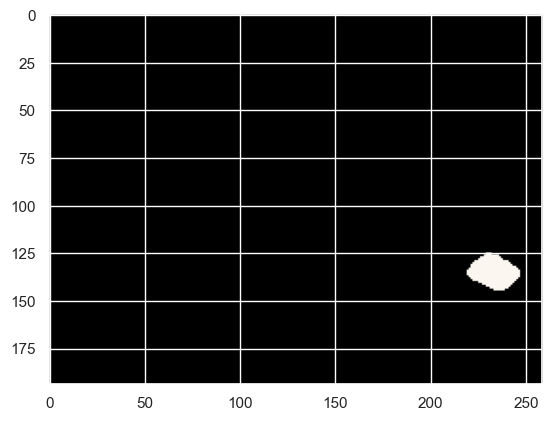

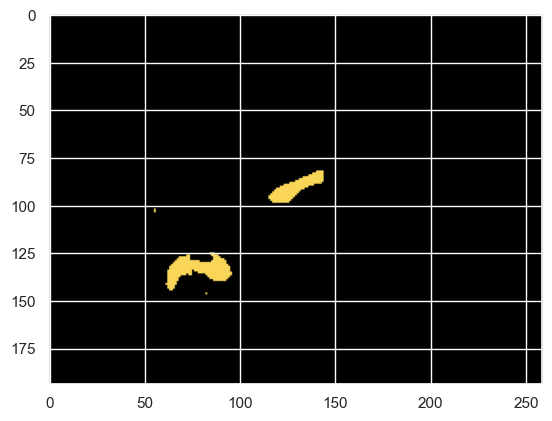

In [21]:
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()